In [26]:
import matplotlib.pyplot as plt
from gaiaxpy import calibrate
import numpy as np

# id = 38655544960  # first entry
# id = 2947050466531872640   # Paper Fig. 22
# id = 2947047202356748672
id = 194912732657384320

sampling = np.arange(336, 1021, 2)
# sampling = np.arange(336, 1021, 10)

data, _ = calibrate([id], sampling=sampling, save_file=False)

In [27]:
for i in range(0, 10):
    print(data["flux"][0][i], data["flux_error"][0][i])

3.979144966210756e-18 2.2080084839203864e-18
3.857352113922316e-18 1.5844520797080374e-18
3.30286197125955e-19 1.2733850430621139e-18
-1.3178519239764192e-18 1.0670375477780506e-18
5.113201269723106e-19 1.00255035903658e-18
2.3311701576887355e-18 9.740670272555593e-19
8.83407866014163e-19 1.0033065591452414e-18
-2.1612063655704654e-18 1.0609861972256591e-18
-2.5703093466518273e-18 1.1387658173594177e-18
1.337967631523078e-19 1.2157226307413161e-18


<ErrorbarContainer object of 3 artists>

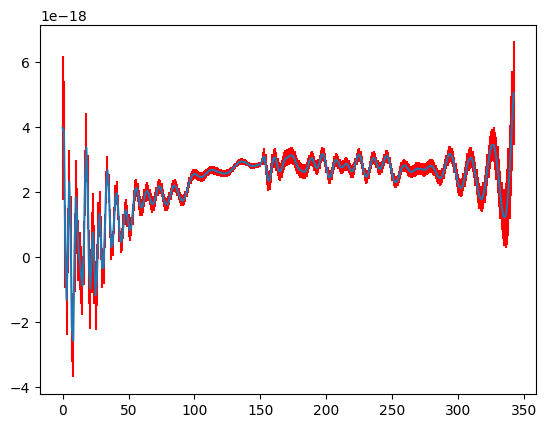

In [28]:
# plt.plot(data["flux"][0])
plt.errorbar(
    range(len(data["flux"][0])),
    data["flux"][0],
    yerr=data["flux_error"][0],
    ecolor="red",
)

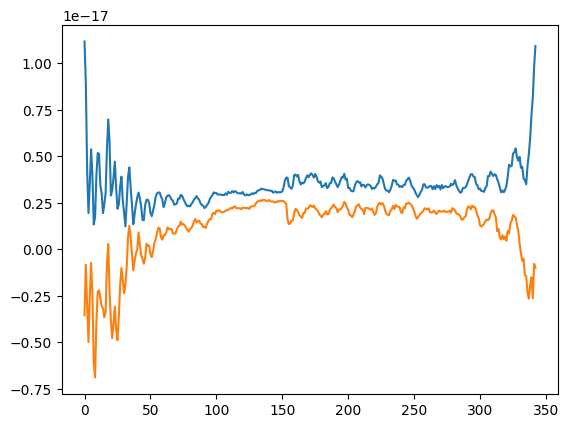

In [29]:
import torch

max = torch.zeros(343)
min = torch.ones(343)
for i in range(0, 1000):
    sample = torch.normal(
        mean=torch.Tensor(data["flux"][0]), std=torch.Tensor(data["flux_error"][0])
    )
    max = torch.maximum(sample, max)
    min = torch.minimum(sample, min)
plt.plot(max.numpy())
plt.plot(min.numpy())

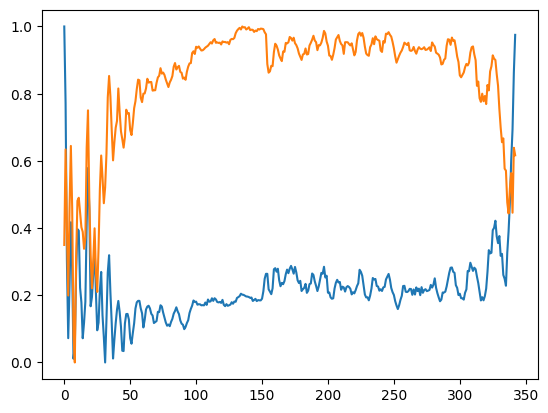

In [30]:
max = max.numpy()
min = min.numpy()
normalized_max = (max - np.min(max)) / (np.max(max) - np.min(max))
normalized_min = (min - np.min(min)) / (np.max(min) - np.min(min))
plt.plot(normalized_max)
plt.plot(normalized_min)